# 1. Importing all libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Reading dataset

In [16]:
df = pd.read_csv('used_cars_data.csv')
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [18]:
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [19]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [20]:
#Percentage of missing values in each column

df.isnull().sum()/len(df)*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

# 3. Data Reduction

In [21]:
df = df.drop(['S.No.'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


# 4. Feature Engineering

## Creating new features

    1. Car_Age to know the age of the car
    2. Brand
    3. Model

In [22]:
from datetime import date

date.today().year

df['Car_Age'] = date.today().year - df['Year']
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11


In [23]:
df['Brand'] = df.Name.str.split().str.get(0)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11,Audi


In [24]:
df['Model'] = df.Name.str.split().str.get(1) + df.Name.str.split().str.get(2)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11,Audi,A4New


In [25]:
df[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [26]:
df['Mileage_unit'] = df.Mileage.str.split().str.get(1)
df['Mileage_unit'].unique()

array(['km/kg', 'kmpl', nan], dtype=object)

In [27]:
# df.Seats.isnull().sum()
# df['Seats'].fillna(value=np.nan,inplace=True)
# df['Seats']=df.groupby(['Model','Brand'])['Seats'].apply(lambda x:x.fillna(x.median()))
# df['Engine']=df.groupby(['Brand','Model'])['Engine'].apply(lambda x:x.fillna(x.median()))
# df['Power']=df.groupby(['Brand','Model'])['Power'].apply(lambda x:x.fillna(x.median()))

In [28]:
df['Engine_unit'] = df.Engine.str.split().str.get(1)
df['Engine_unit'].unique()

array(['CC', nan], dtype=object)

In [29]:
df['Power_unit'] = df.Power.str.split().str.get(1)
df['Power_unit'].unique()

array(['bhp', nan], dtype=object)

In [30]:
df['Engine'] = df.Engine.str.split().str.get(0)
df.Engine = df.Engine.apply(lambda x : pd.to_numeric(x, errors = 'coerce')).copy().fillna(0.0)
df['Engine'].isnull().sum()

np.int64(0)

In [31]:
df['Power'] = df.Power.str.split().str.get(0)
df.Power = df.Power.apply(lambda x : pd.to_numeric(x, errors = 'coerce')).copy().fillna(0.0)
df['Power'].isnull().sum()

np.int64(0)

In [32]:
df['Mileage'] = df.Mileage.str.split().str.get(0)
df.Mileage = df.Mileage.apply(lambda x : pd.to_numeric(x, errors = 'coerce')).copy().fillna(0.0)
df['Mileage'].isnull().sum()

np.int64(0)

In [33]:
df.loc[df["Mileage"]==0.0,'Mileage']=np.nan
df.Mileage.isnull().sum()

np.int64(83)

In [34]:
df.New_Price = df.New_Price.fillna("0.0 Lakh")

In [35]:
df['New_Price_unit'] = df.New_Price.str.split().str.get(1)
df['New_Price_unit'].unique()

array(['Lakh', 'Cr'], dtype=object)

In [36]:
df.loc[df['New_Price_unit'] == 'Cr', 'New_Price_int'] =(df['New_Price'].str.split().str.get(0).astype(float)*100.0).round(2)
df.loc[df['New_Price_unit'] == 'Lakh', 'New_Price_int'] = (df['New_Price'].str.split().str.get(0).astype(float)).round(2)
df['New_Price_int'] = pd.to_numeric(df['New_Price_int'])
df['New_Price_int'].unique()

array([  0.  ,   8.61,  21.  ,  10.65,  32.01,  47.87,  10.57,  12.33,
        11.12,  23.64,  18.64,  19.34,  49.14,  11.81,  16.65,   6.67,
         6.45,   6.41,  27.  ,   5.13,  54.43,   9.51,   9.96,  14.44,
         4.53,  95.04,  13.49, 128.  ,  60.88,   7.39,  69.47,   8.78,
        12.74,  10.52,  11.98,   8.54,  33.58,   9.12,   5.29,  44.28,
        20.74,  11.74,  25.52,  14.07,  95.13,   8.34,   8.85,  25.4 ,
        16.67,  79.43,   6.62, 104.  ,  58.67,  28.37,   4.48,  72.64,
        36.15,  44.59,  12.  ,  14.65,  53.72,  33.91,  12.51,   9.74,
        95.38,  60.59,  11.28,  11.48,  11.26,  43.65,  62.07,  86.97,
       100.  ,   4.74,  14.84,  49.49,  48.18,  12.34,  15.38,  19.21,
        22.95,  11.15,  10.32,  28.05,  59.77,  15.86,  19.43,  42.12,
        16.95,  15.45,   7.87,   4.7 ,  15.02,  12.56,  11.33,  26.45,
        10.34,   7.46,  11.85,  10.41,   5.57,  42.48,  16.04,   9.1 ,
         7.65,  13.74,   5.72,  21.33,  78.76,   4.29,  10.04,  11.67,
      

In [37]:
print(df['New_Price_int'].isnull().sum())
print(df.dtypes)

0
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price             object
Price                float64
Car_Age                int64
Brand                 object
Model                 object
Mileage_unit          object
Engine_unit           object
Power_unit            object
New_Price_unit        object
New_Price_int        float64
dtype: object


# 5. Data Cleaning / Wrangling

1. Some variables are not relevant and not easy to understand
2. Some might need data entry errors
3. Some other might need data type conversion

In [38]:
print(df.Brand.unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']


In [39]:
print(df.Brand.nunique())

33


In [40]:
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
df[df.Brand.str.contains('|'.join(searchfor))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,New_Price,Price,Car_Age,Brand,Model,Mileage_unit,Engine_unit,Power_unit,New_Price_unit,New_Price_int
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179.0,187.70,...,0.0 Lakh,27.00,10,Land,RoverRange,kmpl,CC,bhp,Lakh,0.00
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,NaN,2179.0,115.00,...,0.0 Lakh,17.50,12,Land,RoverFreelander,kmpl,CC,bhp,Lakh,0.00
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.60,1998.0,112.00,...,0.0 Lakh,23.00,7,Mini,CountrymanCooper,kmpl,CC,bhp,Lakh,0.00
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.70,2179.0,187.70,...,0.0 Lakh,55.76,6,Land,RoverRange,kmpl,CC,bhp,Lakh,0.00
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82,1998.0,189.08,...,44.28 Lakh,35.67,7,Mini,CooperConvertible,kmpl,CC,bhp,Lakh,44.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6919,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.40,2499.0,134.00,...,0.0 Lakh,NaN,7,ISUZU,D-MAXV-Cross,kmpl,CC,bhp,Lakh,0.00
7132,Mini Clubman Cooper S,Pune,2017,2890,Petrol,Manual,First,13.80,1998.0,192.00,...,44.59 Lakh,NaN,7,Mini,ClubmanCooper,kmpl,CC,bhp,Lakh,44.59
7157,Land Rover Range Rover 2.2L Pure,Hyderabad,2015,49000,Diesel,Automatic,Second,12.70,2179.0,187.70,...,0.0 Lakh,NaN,9,Land,RoverRange,kmpl,CC,bhp,Lakh,0.00
7160,Mini Cooper Countryman D,Hyderabad,2013,50000,Diesel,Automatic,First,23.80,1998.0,112.00,...,0.0 Lakh,NaN,11,Mini,CooperCountryman,kmpl,CC,bhp,Lakh,0.00


In [41]:
df["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,New_Price,Price,Car_Age,Brand,Model,Mileage_unit,Engine_unit,Power_unit,New_Price_unit,New_Price_int
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,...,0.0 Lakh,1.75,14,Maruti,WagonR,km/kg,CC,bhp,Lakh,0.00
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,...,0.0 Lakh,12.50,9,Hyundai,Creta1.6,kmpl,CC,bhp,Lakh,0.00
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,...,8.61 Lakh,4.50,13,Honda,JazzV,kmpl,CC,bhp,Lakh,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,...,0.0 Lakh,6.00,12,Maruti,ErtigaVDI,kmpl,CC,bhp,Lakh,0.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,...,0.0 Lakh,17.74,11,Audi,A4New,kmpl,CC,bhp,Lakh,0.00


# 6. Statistics Summary

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.00
Mileage,7170.0,18.346527,4.157910,6.40,15.3,18.20,21.10,33.54
Engine,7253.0,1606.320833,607.114429,0.00,1197.0,1462.00,1968.00,5998.00
Power,7253.0,110.044421,55.605364,0.00,74.0,91.10,138.03,616.00
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.00
Car_Age,7253.0,10.634634,3.254421,5.00,8.0,10.00,13.00,28.00
New_Price_int,7253.0,3.159571,12.991872,0.00,0.0,0.00,0.00,375.00


In [43]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7170.0,NaN,NaN,NaN,18.346527,4.15791,6.4,15.3,18.2,21.1,33.54
Engine,7253.0,NaN,NaN,NaN,1606.320833,607.114429,0.0,1197.0,1462.0,1968.0,5998.0
Power,7253.0,NaN,NaN,NaN,110.044421,55.605364,0.0,74.0,91.1,138.03,616.0


In [44]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'New_Price', 'Brand', 'Model', 'Mileage_unit', 'Engine_unit',
       'Power_unit', 'New_Price_unit'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Car_Age', 'New_Price_int']


# 7. Univariate Analysis

Year
Skew : -0.84


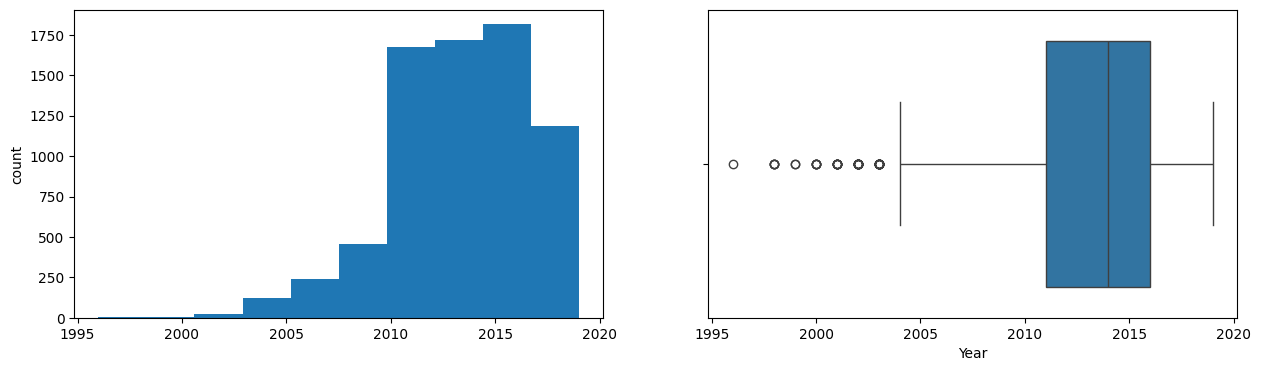

Kilometers_Driven
Skew : 61.58


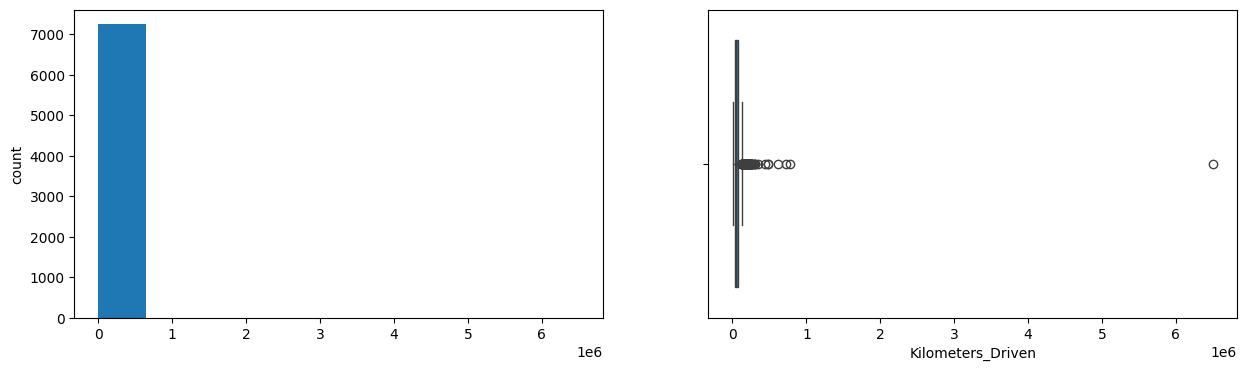

Mileage
Skew : 0.21


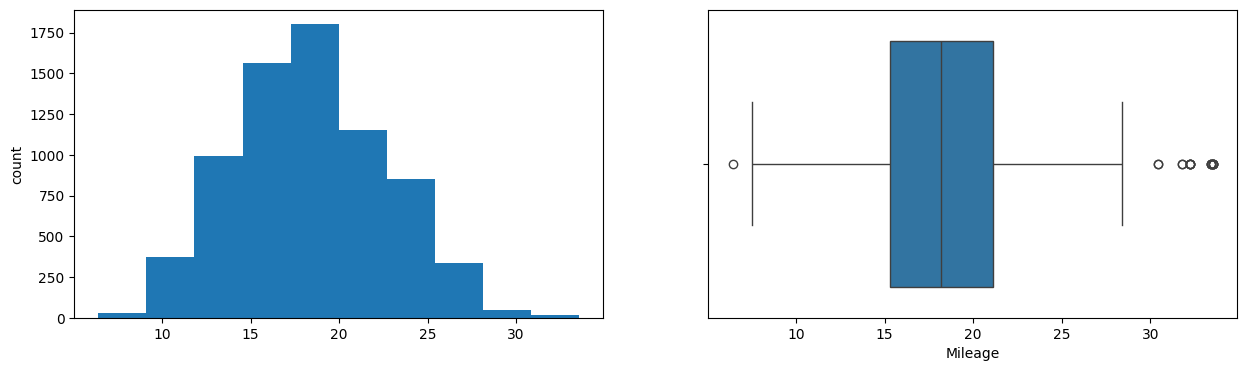

Engine
Skew : 1.25


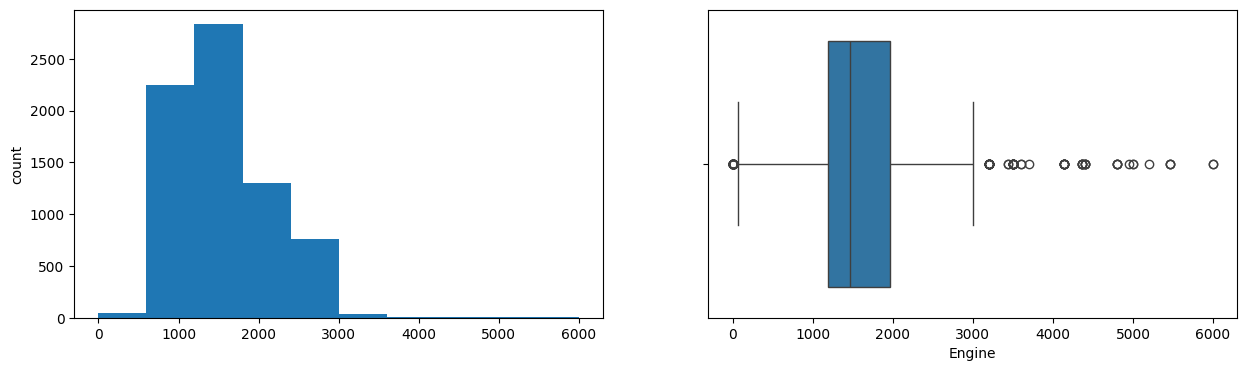

Power
Skew : 1.65


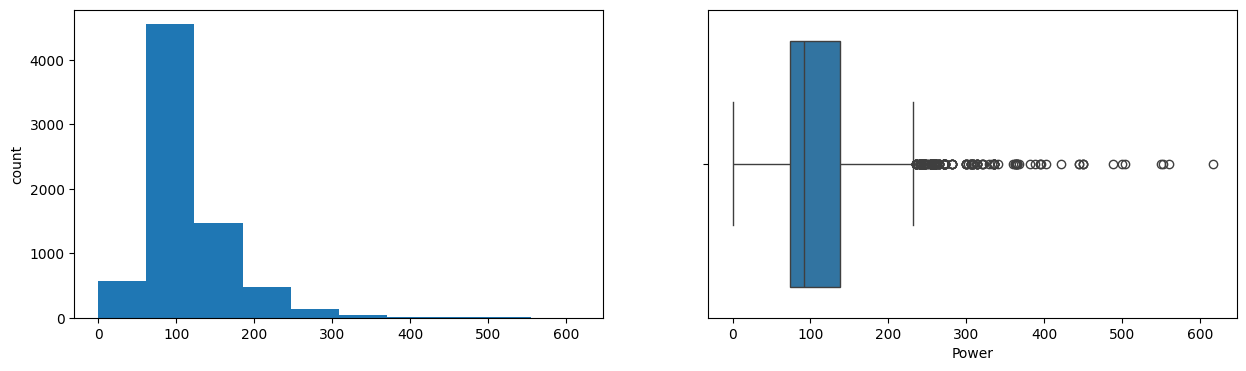

Seats
Skew : 1.9


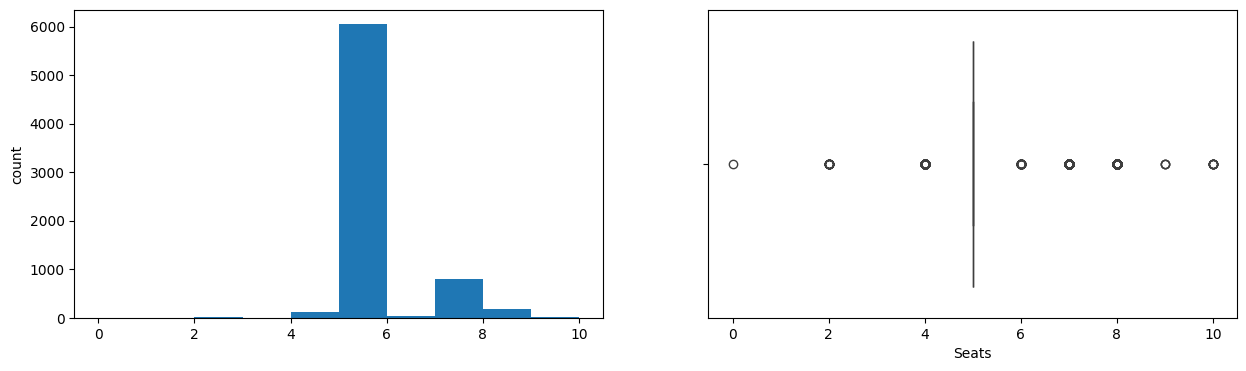

Price
Skew : 3.34


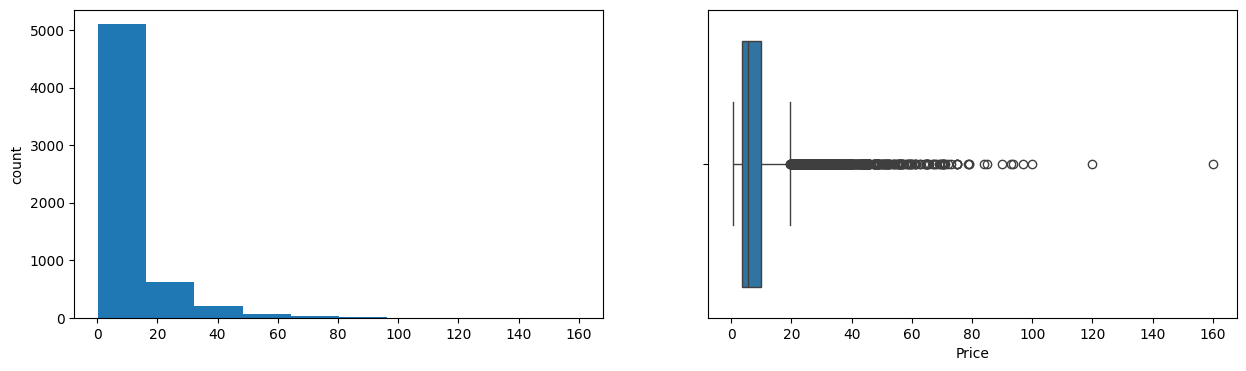

Car_Age
Skew : 0.84


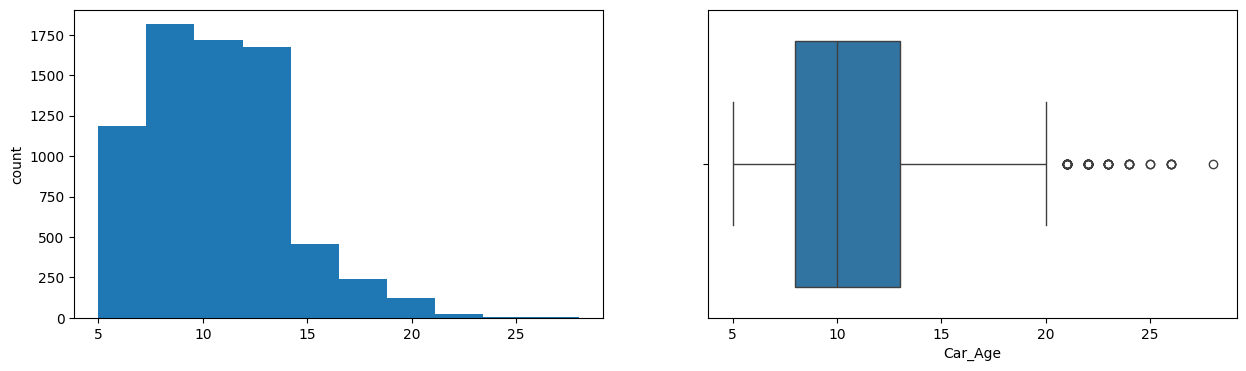

New_Price_int
Skew : 8.9


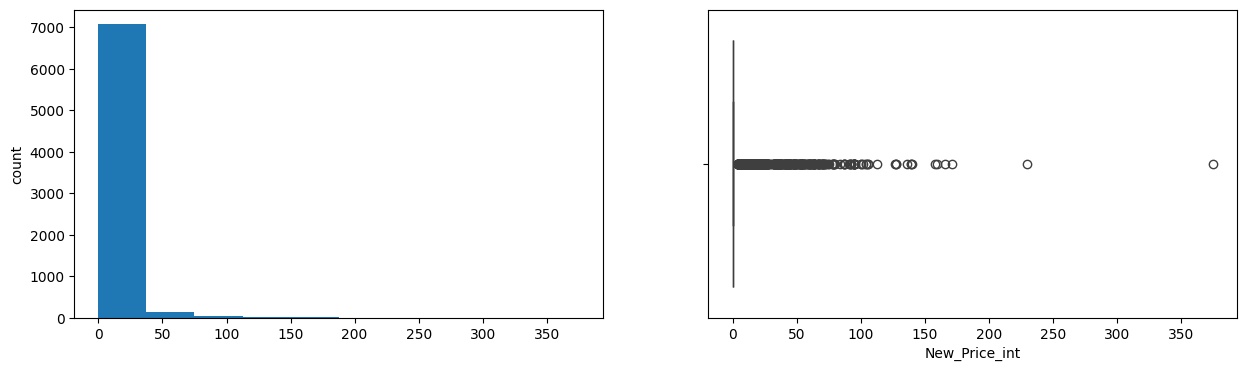

In [45]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

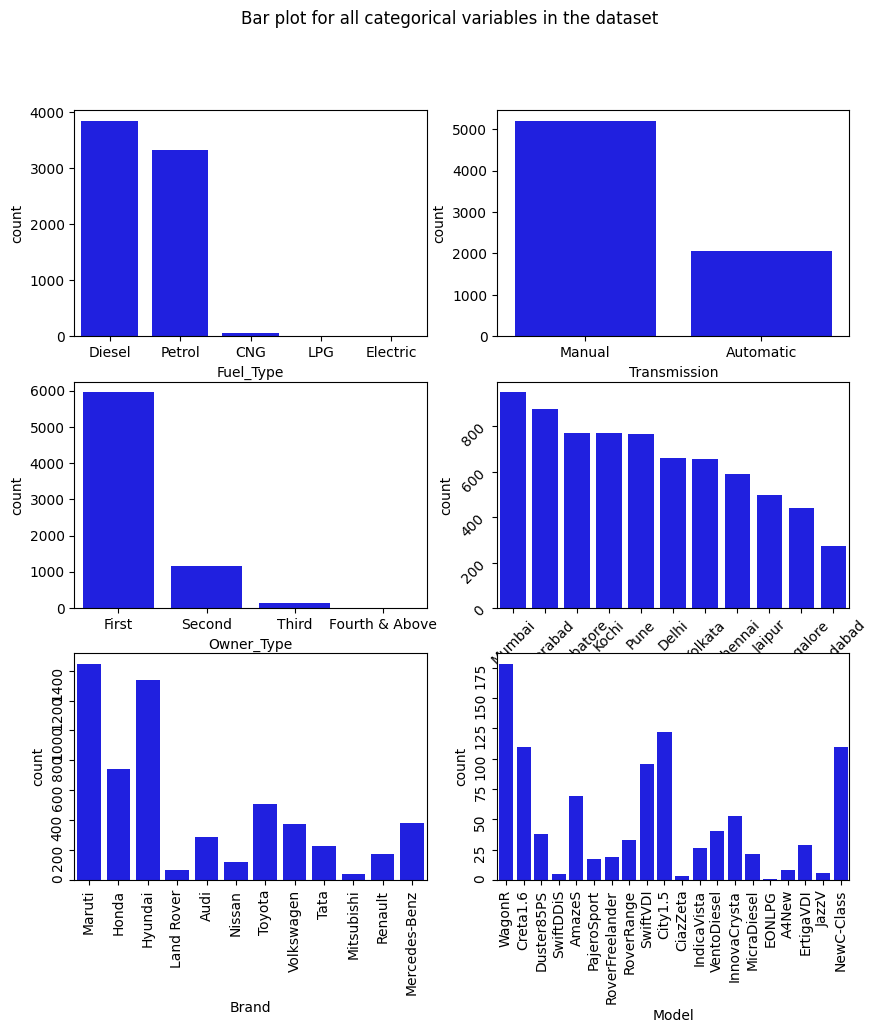

In [46]:
fig, axes = plt.subplots(3, 2, figsize = (10, 10))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = df, color = 'blue', 
              order = df['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = df, color = 'blue', 
              order = df['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = df, color = 'blue', 
              order = df['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = df, color = 'blue', 
              order = df['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = df, color = 'blue', 
              order = df['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = df, color = 'blue', 
              order = df['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

# 8. EDA Data Transformation

In [47]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [48]:
log_transform(df,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7253 non-null   object 
 1   Location               7253 non-null   object 
 2   Year                   7253 non-null   int64  
 3   Kilometers_Driven      7253 non-null   int64  
 4   Fuel_Type              7253 non-null   object 
 5   Transmission           7253 non-null   object 
 6   Owner_Type             7253 non-null   object 
 7   Mileage                7170 non-null   float64
 8   Engine                 7253 non-null   float64
 9   Power                  7253 non-null   float64
 10  Seats                  7200 non-null   float64
 11  New_Price              7253 non-null   object 
 12  Price                  6019 non-null   float64
 13  Car_Age                7253 non-null   int64  
 14  Brand                  7253 non-null   object 
 15  Mode

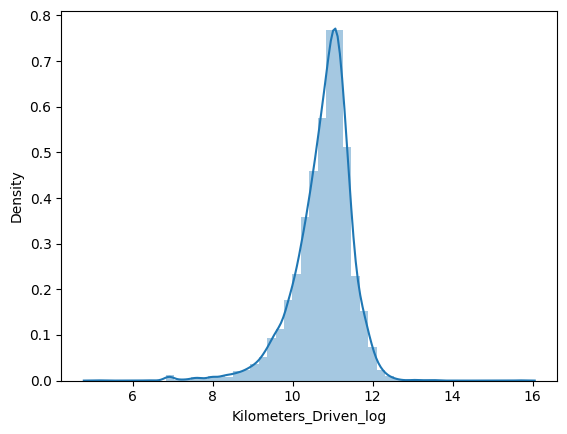

In [49]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(df["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");

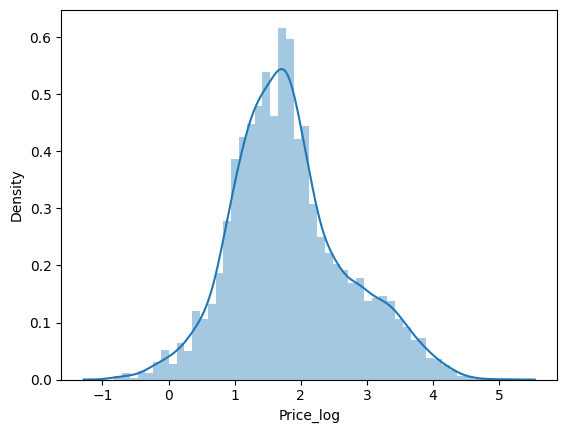

In [50]:
sns.distplot(df["Price_log"], axlabel="Price_log");

# 9. Bivariate Analysis

<Figure size 1300x1700 with 0 Axes>

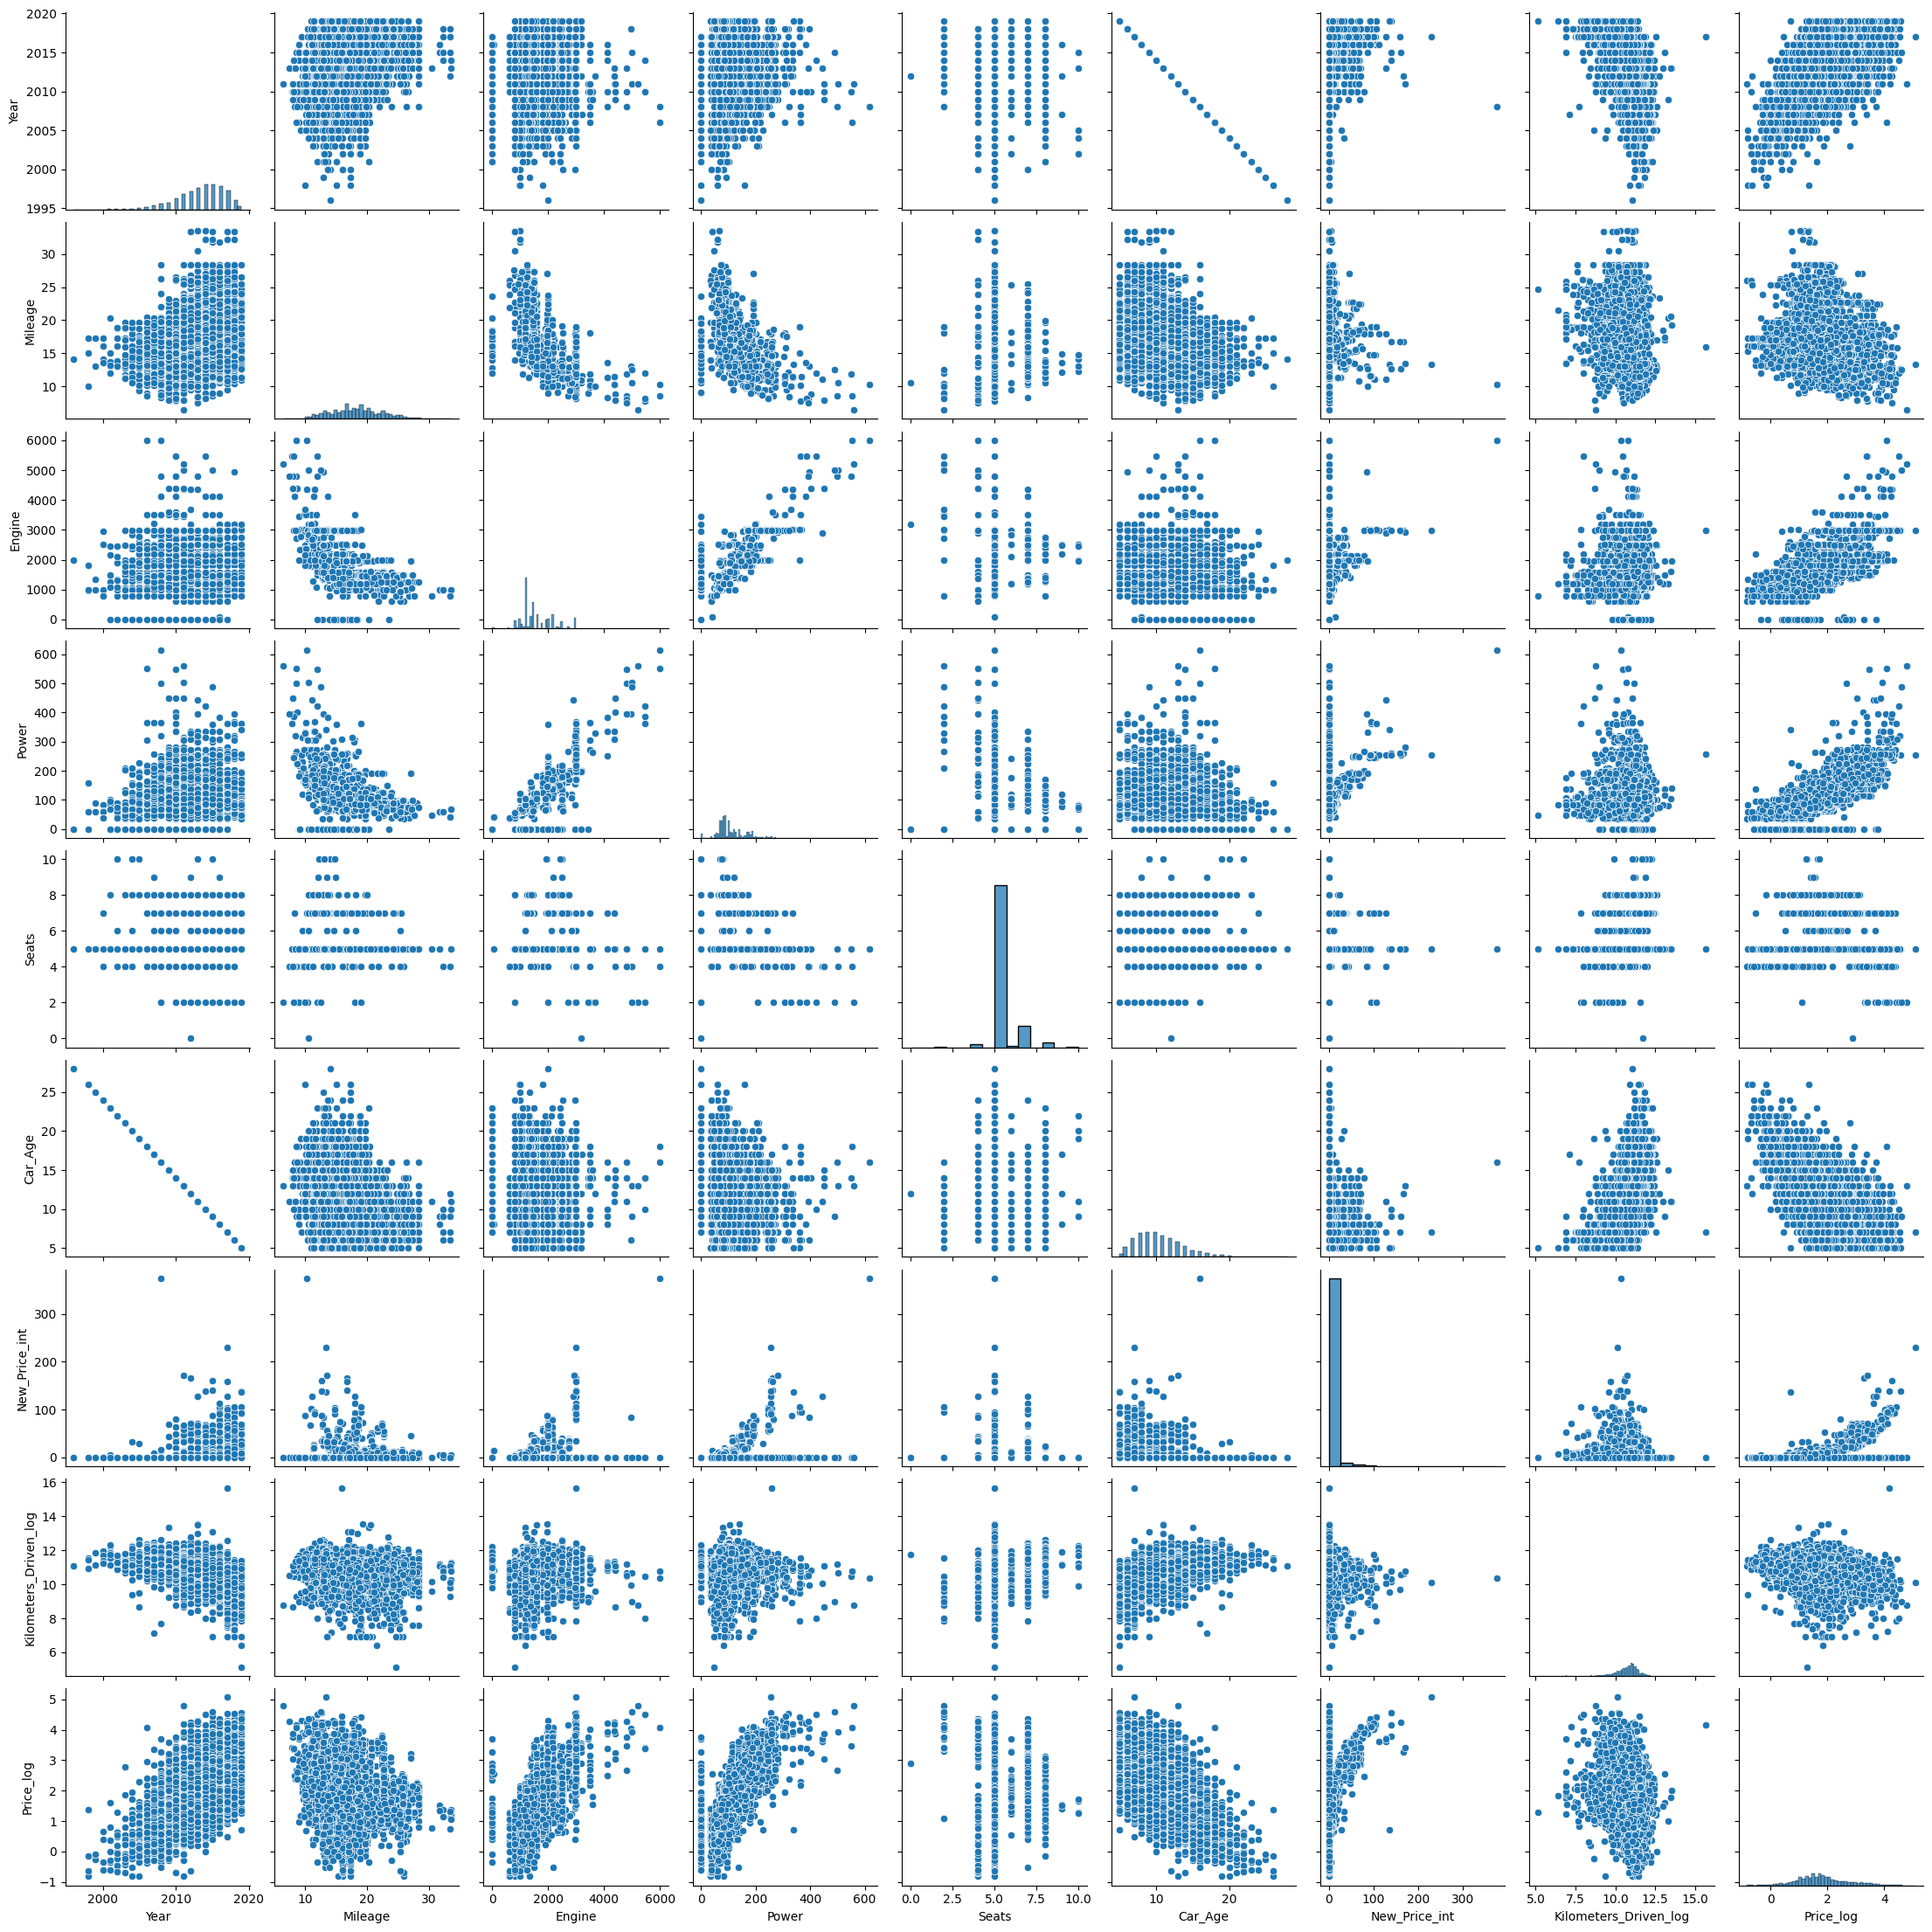

In [51]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

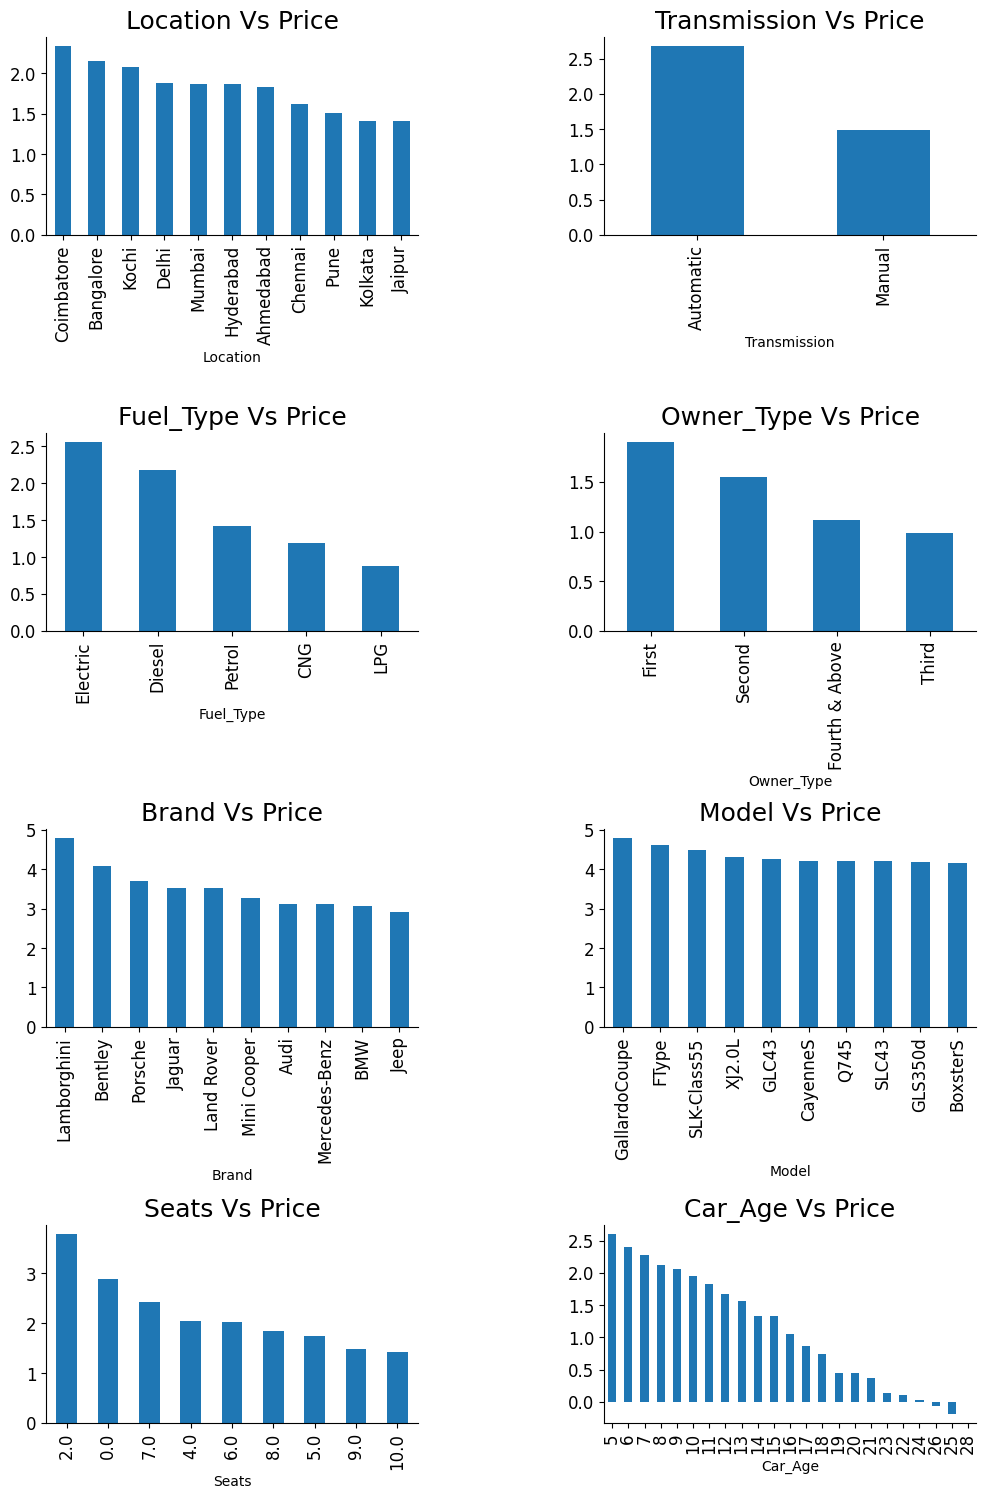

In [52]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
df.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
df.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
df.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
df.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
df.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
df.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
df.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
df.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

# 10. EDA Multivariate Analysis

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7253 non-null   object 
 1   Location               7253 non-null   object 
 2   Year                   7253 non-null   int64  
 3   Kilometers_Driven      7253 non-null   int64  
 4   Fuel_Type              7253 non-null   object 
 5   Transmission           7253 non-null   object 
 6   Owner_Type             7253 non-null   object 
 7   Mileage                7170 non-null   float64
 8   Engine                 7253 non-null   float64
 9   Power                  7253 non-null   float64
 10  Seats                  7200 non-null   float64
 11  New_Price              7253 non-null   object 
 12  Price                  6019 non-null   float64
 13  Car_Age                7253 non-null   int64  
 14  Brand                  7253 non-null   object 
 15  Mode

In [54]:
heatmap_cols = num_cols
heatmap_cols

['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price',
 'Car_Age',
 'New_Price_int']

In [55]:
heatmap_cols.remove('Kilometers_Driven')
heatmap_cols.remove('Price')
heatmap_cols.append('Kilometers_Driven_log')
heatmap_cols.append('Price_log')

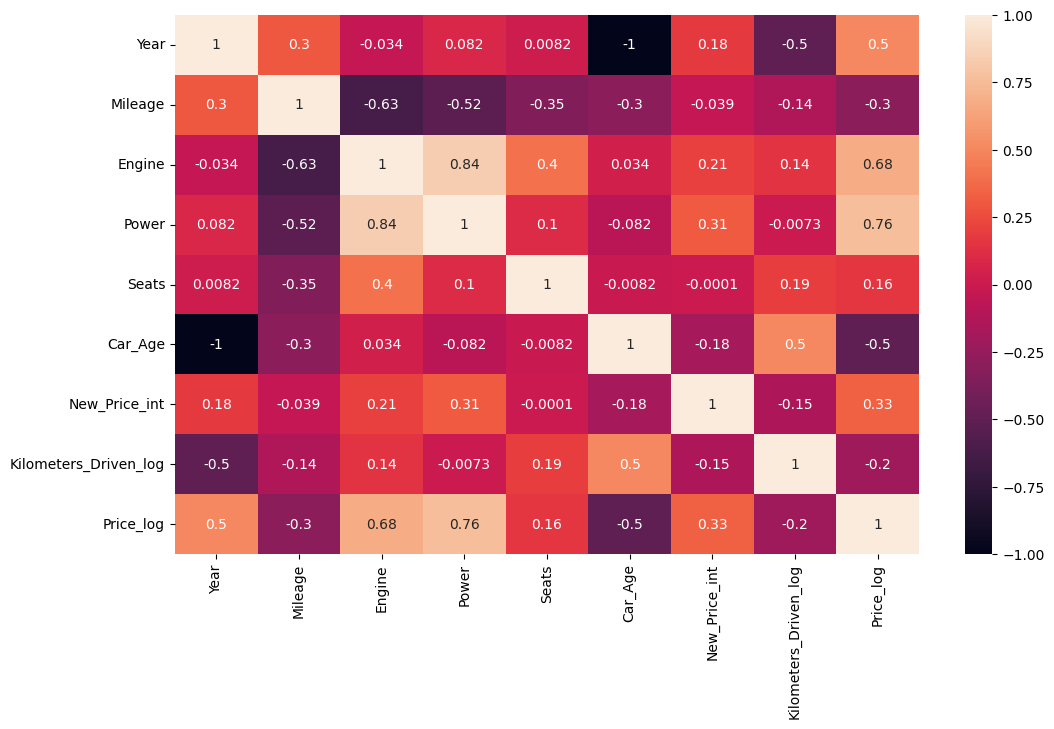

In [56]:
plt.figure(figsize=(12, 7))
sns.heatmap(df[heatmap_cols].corr(), annot = True, vmin = -1, vmax = 1)
plt.show()